<a href="https://colab.research.google.com/github/shahriar2203041/ml-with-python/blob/main/pcb_short_circuit%20_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Install Library
print("Installing Ultralytics...")
!pip install ultralytics -q

# 3. Unzip Data (This takes about 1 minute)
print("Unzipping data...")
!unzip -q /content/drive/MyDrive/archive.zip -d /content/
print("Done!")

Mounted at /content/drive
Installing Ultralytics...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.1 MB/s eta 0:00:00
Unzipping data...
Done!


In [2]:
import yaml

yaml_file = '/content/pcb-defect-dataset/data.yaml'

with open(yaml_file, 'r') as f:
    data = yaml.safe_load(f)

# Set paths correctly
data['train'] = '/content/pcb-defect-dataset/train/images'
data['val']   = '/content/pcb-defect-dataset/val/images'  # Uses 'val' folder

with open(yaml_file, 'w') as f:
    yaml.dump(data, f)

print("Configuration fixed for GPU!")

Configuration fixed for GPU!


In [3]:
from ultralytics import YOLO

# Load model
model = YOLO("yolov8n.pt")

# Train
results = model.train(
    data="/content/pcb-defect-dataset/data.yaml",
    epochs=20,
    imgsz=640,
    batch=16,
    project="PCB_Research",
    name="GPU_Run_Final"
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.19 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/pcb-defect-dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz

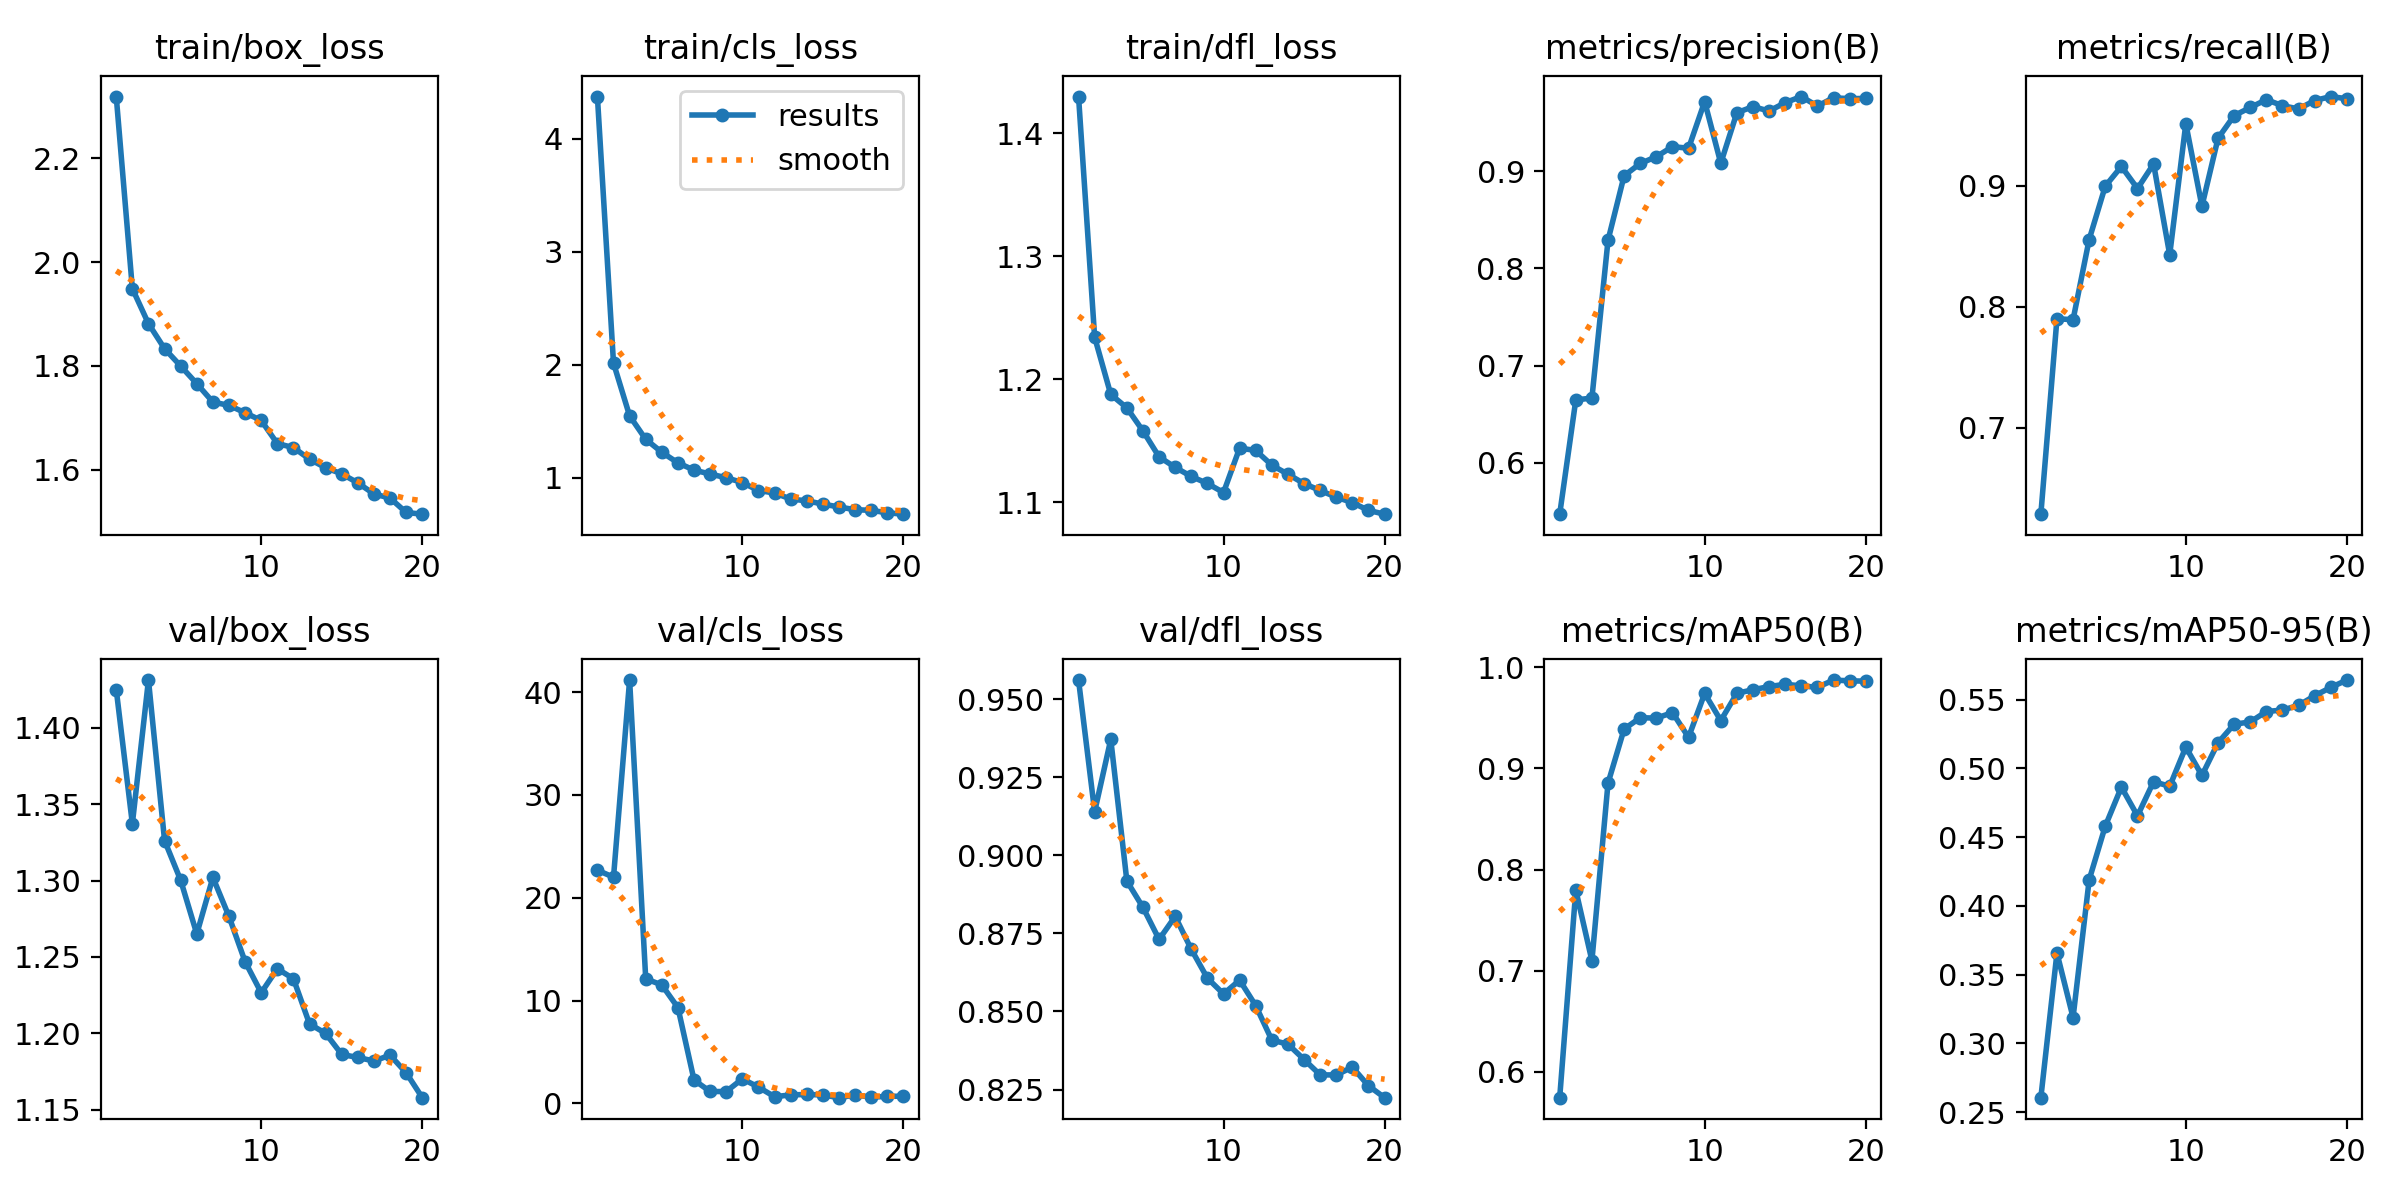

In [4]:
from IPython.display import Image
Image(filename='/content/runs/detect/PCB_Research/GPU_Run_Final/results.png', width=1000)

In [5]:
import os
# List the first 5 images in the validation folder
imgs = os.listdir('/content/pcb-defect-dataset/val/images')
print(imgs[:5])

['rotation_270_light_07_open_circuit_05_1_600.jpg', 'light_05_spurious_copper_07_4_600.jpg', 'rotation_90_light_08_missing_hole_06_3_600.jpg', 'rotation_270_light_06_short_04_3_600.jpg', 'rotation_270_light_07_mouse_bite_01_4_600.jpg']


Running prediction...

image 1/1 /content/pcb-defect-dataset/val/images/rotation_270_light_07_open_circuit_05_1_600.jpg: 640x640 1 open_circuit, 7.8ms
Speed: 4.3ms preprocess, 7.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


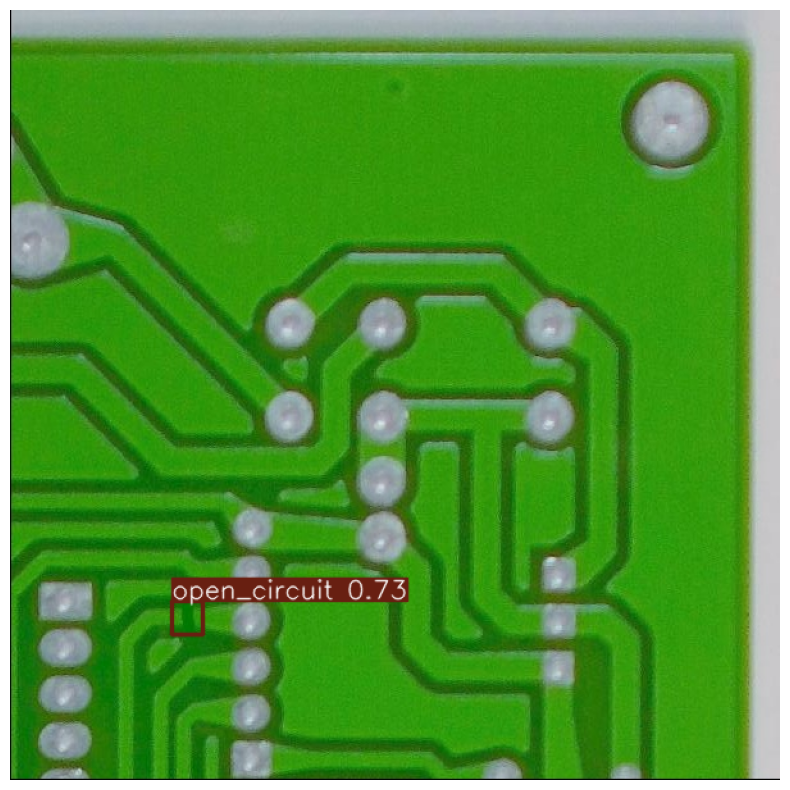

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4.], device='cuda:0')
conf: tensor([0.7310], device='cuda:0')
data: tensor([[126.7450, 461.8422, 150.6750, 487.1443,   0.7310,   4.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (601, 601)
shape: torch.Size([1, 6])
xywh: tensor([[138.7100, 474.4933,  23.9300,  25.3022]], device='cuda:0')
xywhn: tensor([[0.2308, 0.7895, 0.0398, 0.0421]], device='cuda:0')
xyxy: tensor([[126.7450, 461.8422, 150.6750, 487.1443]], device='cuda:0')
xyxyn: tensor([[0.2109, 0.7685, 0.2507, 0.8106]], device='cuda:0')


In [6]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# 1. Load your trained model (The one you just finished training)
model = YOLO('/content/runs/detect/PCB_Research/GPU_Run_Final/weights/best.pt')

# 2. Set the image path using the first image from your list
image_path = '/content/pcb-defect-dataset/val/images/rotation_270_light_07_open_circuit_05_1_600.jpg'

# 3. Run prediction
print("Running prediction...")
results = model(image_path)

# 4. Plot and show the result
# 'res_plotted' contains the image with the red boxes and labels drawn on it
res_plotted = results[0].plot()

plt.figure(figsize=(10, 10))
plt.imshow(res_plotted)
plt.axis('off') # Hide the axis numbers
plt.show()

# 5. Print the details
for r in results:
    print(r.boxes) # This prints the coordinates and confidence scores

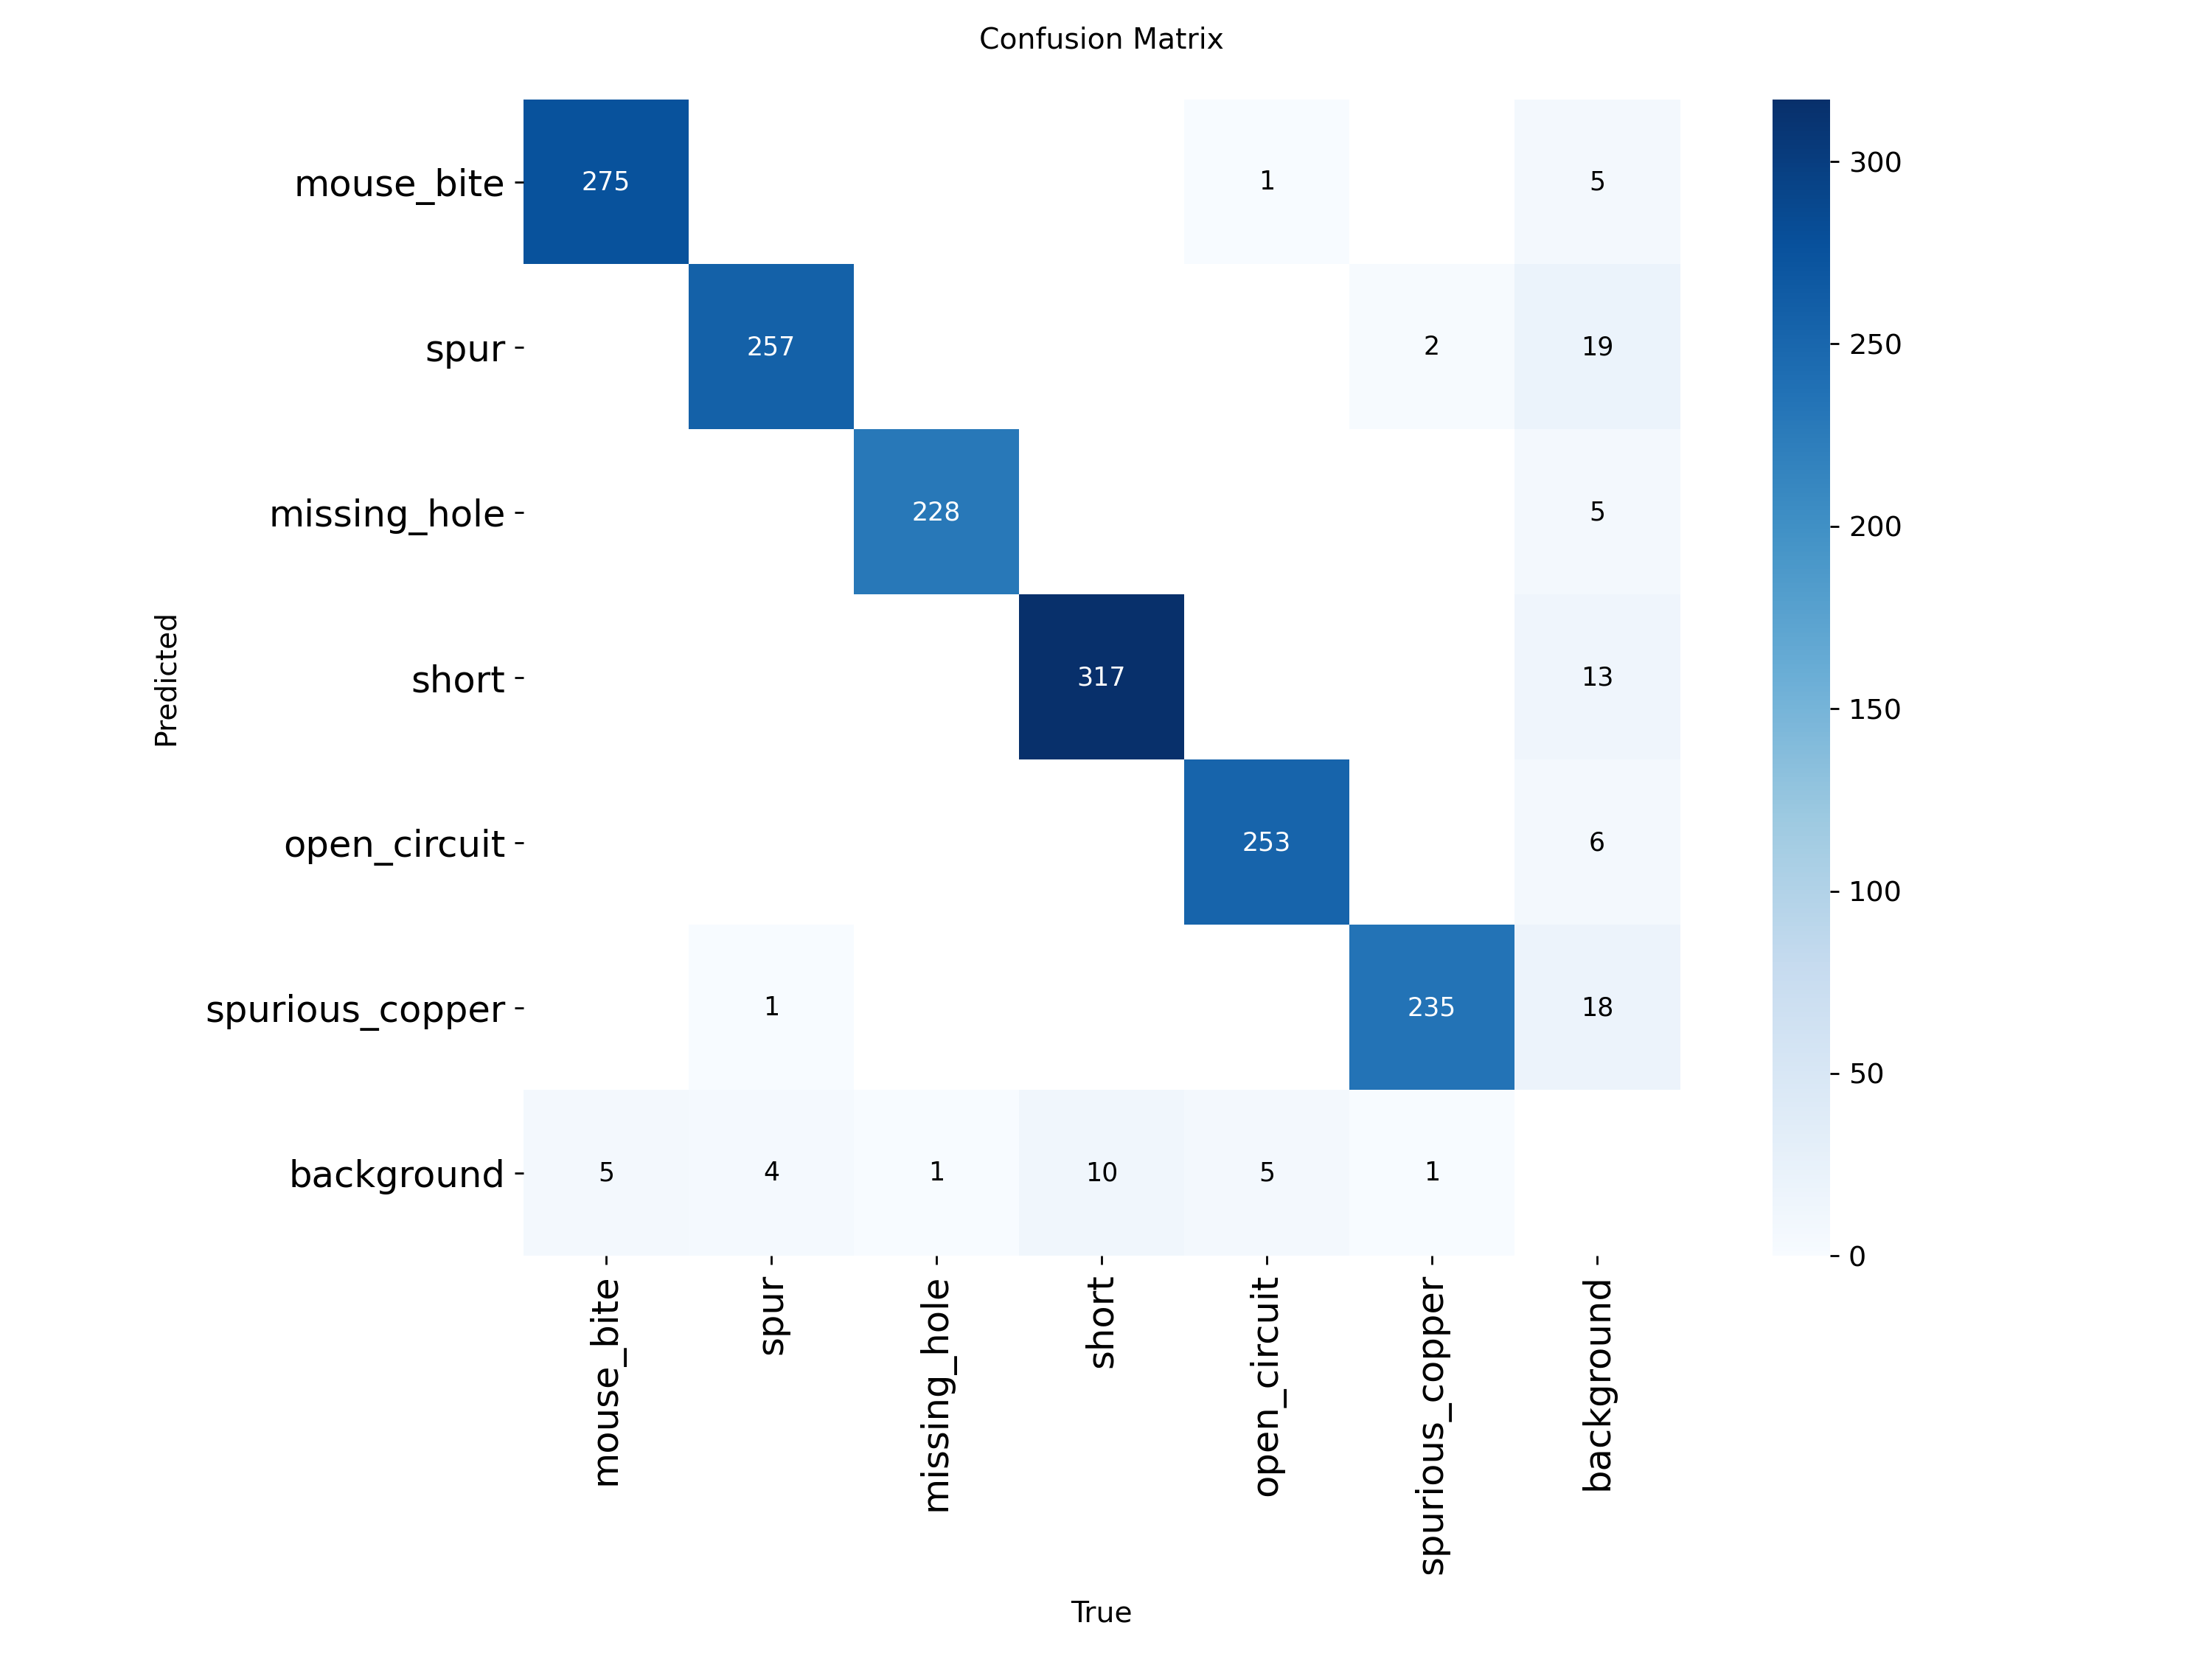

In [7]:
from IPython.display import Image
# This graph shows the performance for each class
Image(filename='/content/runs/detect/PCB_Research/GPU_Run_Final/confusion_matrix.png', width=1000)